# Naive Bayes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df[df.columns[2:]].notna().sum()

Unnamed: 2    50
Unnamed: 3    12
Unnamed: 4     6
dtype: int64

In [8]:
df_no_NaN =df.dropna(axis=1)
df_no_NaN.columns = ["class", "content"]
df_no_NaN.head()

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:xlabel='class', ylabel='count'>

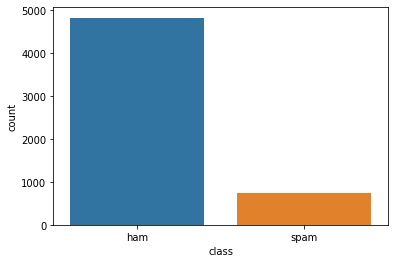

In [14]:
sns.countplot(data=df_no_NaN, x="class")

In [10]:
df_onehot = pd.get_dummies(df_no_NaN, columns=["class"] , drop_first=True)
X, y = df_onehot["content"], df_onehot["class_spam"]

## TF_IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(X)

print(X_tfidf.todense())
print(repr(X_tfidf))
print("max", X_tfidf.min(), "min", X_tfidf.max())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>
max 0.0 min 1.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((3733, 8404), (1839, 8404))

<AxesSubplot:xlabel='class_spam', ylabel='count'>

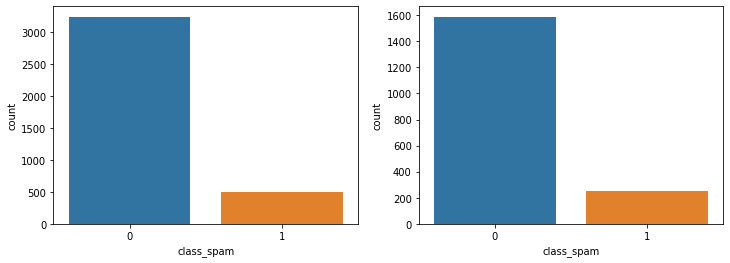

In [22]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
sns.countplot(x=y_train, ax=ax[0])
sns.countplot(x=y_test, ax=ax[1])

## Naive Bayes

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1587
           1       1.00      0.75      0.86       252

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839



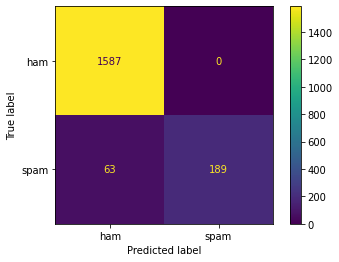

In [30]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

naive_bayes = dict(
    multinomial = MultinomialNB(),
    bernoulli = BernoulliNB(),
    complement = ComplementNB
)

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm,display_labels=["ham", "spam"]).plot()


evaluate_model(naive_bayes["multinomial"])

# Precision = TP/(TP+FP)
# Recall = TP/(TP+FN)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1587
           1       0.98      0.81      0.89       252

    accuracy                           0.97      1839
   macro avg       0.97      0.91      0.94      1839
weighted avg       0.97      0.97      0.97      1839



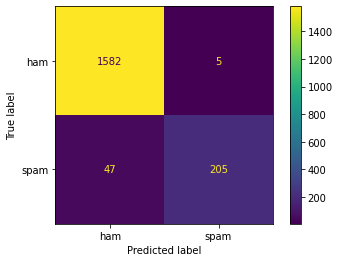

In [33]:
evaluate_model(naive_bayes["bernoulli"])

In [32]:
evaluate_model(naive_bayes["complement"])

TypeError: fit() missing 1 required positional argument: 'y'

## Some other models

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.97      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.97      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



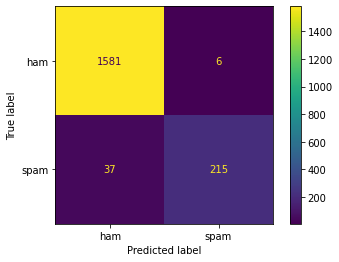

In [35]:
from sklearn.svm import LinearSVC

evaluate_model(LinearSVC())

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1587
           1       1.00      0.84      0.91       252

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



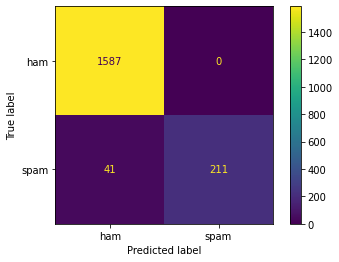

In [37]:
from sklearn.ensemble import RandomForestClassifier

evaluate_model(RandomForestClassifier())


## Combine models
- pluralite vote
- class with most votes win

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1587
           1       1.00      0.80      0.89       252

    accuracy                           0.97      1839
   macro avg       0.98      0.90      0.94      1839
weighted avg       0.97      0.97      0.97      1839



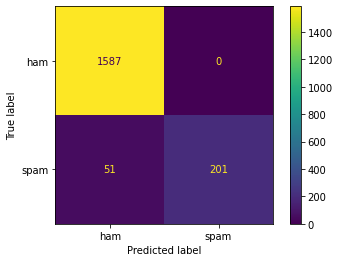

In [38]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier([
    ("rf", RandomForestClassifier()),
    ("SVC", LinearSVC()),
    ("bernoulli", BernoulliNB()),
    ("multinomial",  MultinomialNB())

])

evaluate_model(vote_clf)

## "Deployment"

In [42]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [("tfidf", TfidfVectorizer(stop_words="english")), ("vote", vote_clf)])

pipe.fit(X, y)


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('vote',
                 VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                                              ('SVC', LinearSVC()),
                                              ('bernoulli', BernoulliNB()),
                                              ('multinomial',
                                               MultinomialNB())]))])

In [43]:
pipe.predict(["Come and collect your $1000 Bitcoins"])

array([0], dtype=uint8)

In [44]:
pipe.predict(["You will win, $1000 for free"])

array([0], dtype=uint8)